### Identitas Mahasiswa
Nama   : Rian Setiyana <br>
NIM    : 1306620015 <br>
Prodi  : Fisika A 2020

In [37]:
# Mengimport library yang dibutuhkan
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

In [15]:
# Membuat fungsi processImage 
def processImage(image): 
  image = cv2.imread(image) 
  image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY) 
  return image

In [16]:
# Membuat fungsi convolve2D 
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

In [45]:
start_time = time.time()

# Grayscale Image
image = processImage('Astronot.jpg')

# Edge Detection Kernel
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

# Convolve and Save Output
output = convolve2D(image, kernel, padding=2)
cv2.imwrite('2DConvolved.jpg', output)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.  21. ... 169.   0.   0.]
 ...
 [  0.   0.  11. ...  25.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


True

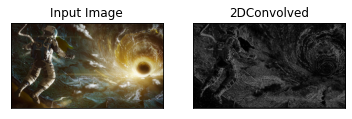

5.654652833938599 detik


In [46]:
# Menampilkan gambar
img = cv2.imread('Astronot.jpg', -1)
img_conv = cv2.imread('2DConvolved.jpg', -1)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_conv, cmap = 'gray')
plt.title('2DConvolved'), plt.xticks([]), plt.yticks([])
plt.show()   
print(time.time() - start_time, 'detik')

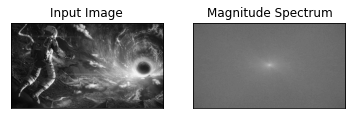

0.34949731826782227 detik


In [52]:
start_time = time.time()
img = cv2.imread('Astronot.jpg',0)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
print(time.time() - start_time, 'detik')